In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
df = pd.read_csv('dataset_invst.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)



,symbol,open,high,low,close,volume,ema_fast,ema_slow,rsi
datetime,,,,,,,,,
2011-07-18 09:15:00,NSE:BAJFINANCE,72.100000,72.790002,71.700000,72.125000,1510490.0,64.814422,62.289000,75.970278
2011-07-19 09:15:00,NSE:BAJFINANCE,72.329999,78.000000,71.809998,73.829999,2082100.0,65.673049,62.741588,78.359873
2011-07-20 09:15:00,NSE:BAJFINANCE,74.950000,75.475000,71.500000,72.725000,489180.0,66.344663,63.133095,73.274192
2011-07-21 09:15:00,NSE:BAJFINANCE,73.000000,73.000000,70.200000,71.179999,346730.0,66.805171,63.448660,66.750938
2011-07-22 09:15:00,NSE:BAJFINANCE,72.000000,73.079999,71.300000,72.720001,673500.0,67.368488,63.812242,69.651168
...,...,...,...,...,...,...,...,...,...
2023-06-22 09:15:00,NSE:BAJFINANCE,7200.100100,7204.149900,7020.000000,7030.000000,827194.0,7056.569611,6758.602355,52.684975
2023-06-23 09:15:00,NSE:BAJFINANCE,7020.950200,7055.000000,6956.100100,6989.649900,815226.0,7050.196305,6767.663043,50.550865
2023-06-26 09:15:00,NSE:BAJFINANCE,6990.000000,7035.000000,6945.000000,6998.700200,563539.0,7045.291914,6776.723323,51.030006


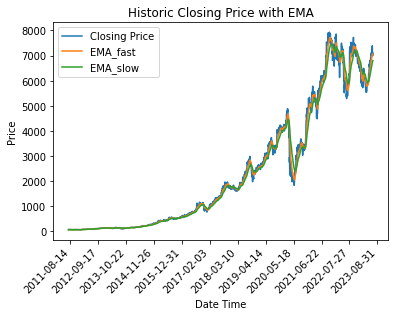

In [37]:
plt.title('Historic Closing Price with EMA')

plt.plot(df['close'], label='Closing Price')
plt.plot(df['ema_fast'], label='EMA_fast')
plt.plot(df['ema_slow'], label='EMA_slow')

plt.xlabel('Date Time')
plt.ylabel('Price')

plt.legend()

plt.xticks(rotation=45, ha='right')

tick_interval = 400 

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_interval))


plt.show()

> The Above graph shows Closing Price and Exponentially moving averages which is given in the dataset itself

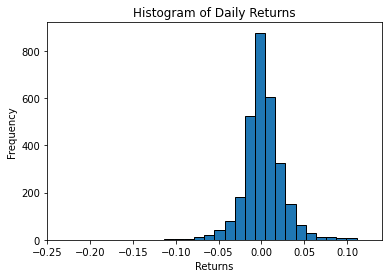

In [38]:
df['returns'] = df['close'].pct_change()

plt.hist(df['returns'].dropna(), bins=30, edgecolor='black')
plt.title('Histogram of Daily Returns')
plt.xlabel('Returns')
plt.ylabel('Frequency')


plt.show()

> returns can be found by first arranging the datapoints in ascending order wrt. time and calculating the percentage change of closing price

> Above is the histogram of frequencies in which the returns occured

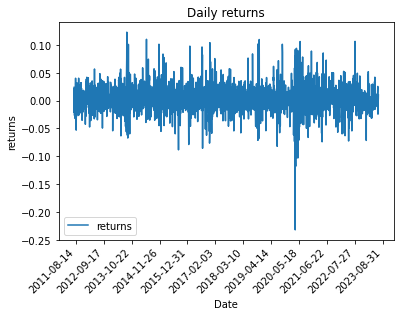

In [39]:
plt.plot(df['returns'], label='returns')

plt.title('Daily returns')
plt.xlabel('Date')
plt.ylabel('returns')
plt.legend()
plt.xticks(rotation=45, ha='right')
tick_interval = 400 
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(tick_interval))


plt.show()

> Above is the graph of daily returns

In [40]:
average_volume = df['volume'].mean()
print("Average Volume:", average_volume)

Average Volume: 1482902.9837343274


> Average Volume cann be found by averaging over the volume data

In [41]:
green_candles = 0
red_candles = 0
for i in range(len(df)):
    if df['open'][i] < df['close'][i]:
        green_candles += 1
    elif df['open'][i] > df['close'][i]:
        red_candles += 1
print("# Green Candles:", green_candles)
print("# Red Candles:", red_candles)

# Green Candles: 1423
# Red Candles: 1523


> green candles is defined as when closing price is greter than openin price

> red candles is defined as when closing price is less than openin price

In [42]:
num_white_soldiers = 0
num_black_crows = 0
for i in range(2, len(df)):
    # Check for Three White Soldiers pattern
    if (
        df['close'][i] > df['close'][i-1] > df['close'][i-2] and
        df['open'][i] > df['open'][i-1] > df['open'][i-2]
    ):
        num_white_soldiers += 1

    # Check for Three Black Crows pattern
    elif (
        df['close'][i] < df['close'][i-1] < df['close'][i-2] and
        df['open'][i] < df['open'][i-1] < df['open'][i-2]
    ):
        num_black_crows += 1

# Print the results
print("#Three White Soldiers patterns:", num_white_soldiers)
print("#Three Black Crows patterns:", num_black_crows)

#Three White Soldiers patterns: 343
#Three Black Crows patterns: 266


- `Three White Soldiers` pattern:three consecutive upward candles, where each candle closes higher than the previous one.
- `Three Black Crows` pattern: three consecutive downward candles, where each candle closes lower than the previous one.